In [6]:
pip install pandas openpyxl xlrd

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv("C://Users//pavan//MLUL2//electricity_bill_dataset1.csv")
df

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  \
0       16            23               2           6        1          0   
1       19            22               2           3        1          0   
2        7            20               2           6        7          0   
3        7            22               3          21        1          0   
4       11            23               2          11        1          0   
...    ...           ...             ...         ...      ...        ...   
45340   18            22               3          22        1          0   
45341   23            23               2           6       12          0   
45342   22            22               2          20        1          0   
45343    8            21               2          22        7          0   
45344    8            17               2           4        1          0   

       Month       City                                            Company  \
0         10  Hyderabad                            Tata Power Company Ltd.   
1          5   Vadodara                                               NHPC   
2          7     Shimla                                    Jyoti Structure   
3          6     Mumbai                                    Power Grid Corp   
4          2     Mumbai          Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)   
...      ...        ...                                                ...   
45340      9  Ahmedabad  Maha Transco – Maharashtra State Electricity T...   
45341      2  New Delhi                                       Orient Green   
45342      1  New Delhi                               GE T&D India Limited   
45343     12  Ratnagiri                                 TransRail Lighting   
45344      1    Gurgaon                    L&T Transmission & Distribution   

       MonthlyHours  TariffRate  ElectricityBill  
0               384         8.4           3225.6  
1               488         7.8           3806.4  
2               416         7.7           3203.2  
3               475         9.2           4370.0  
4               457         9.2           4204.4  
...             ...         ...              ...  
45340           764         7.9           6035.6  
45341           572         8.5           4862.0  
45342           609         8.5           5176.5  
45343           748         7.4           5535.2  
45344           427         8.3           3544.1  

[45345 rows x 12 columns]

In [9]:
df.head(5)

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16            23               2           6        1          0     10   
1   19            22               2           3        1          0      5   
2    7            20               2           6        7          0      7   
3    7            22               3          21        1          0      6   
4   11            23               2          11        1          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8           3806.4  
2         7.7           3203.2  
3         9.2           4370.0  
4         9.2           4204.4

In [10]:
print(df.info())  # Display dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  int64  
 2   AirConditioner   45345 non-null  int64  
 3   Television       45345 non-null  int64  
 4   Monitor          45345 non-null  int64  
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.2+ MB
None


In [11]:
print(df.describe())  # Display summary statistics

                Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.990694     21.705458        1.503959     12.502635      2.865057   
std        5.470816      1.672575        1.115482      5.756007      3.894933   
min        5.000000     17.000000        0.000000      3.000000      1.000000   
25%        9.000000     22.000000        1.000000      7.000000      1.000000   
50%       14.000000     22.000000        2.000000     13.000000      1.000000   
75%       19.000000     23.000000        2.000000     17.000000      1.000000   
max       23.000000     23.000000        3.000000     22.000000     12.000000   

       MotorPump         Month  MonthlyHours    TariffRate  ElectricityBill  
count    45345.0  45345.000000  45345.000000  45345.000000     45345.000000  
mean         0.0      6.488058    515.083207      8.369648      4311.771307  
std          0.0      3.443252    12

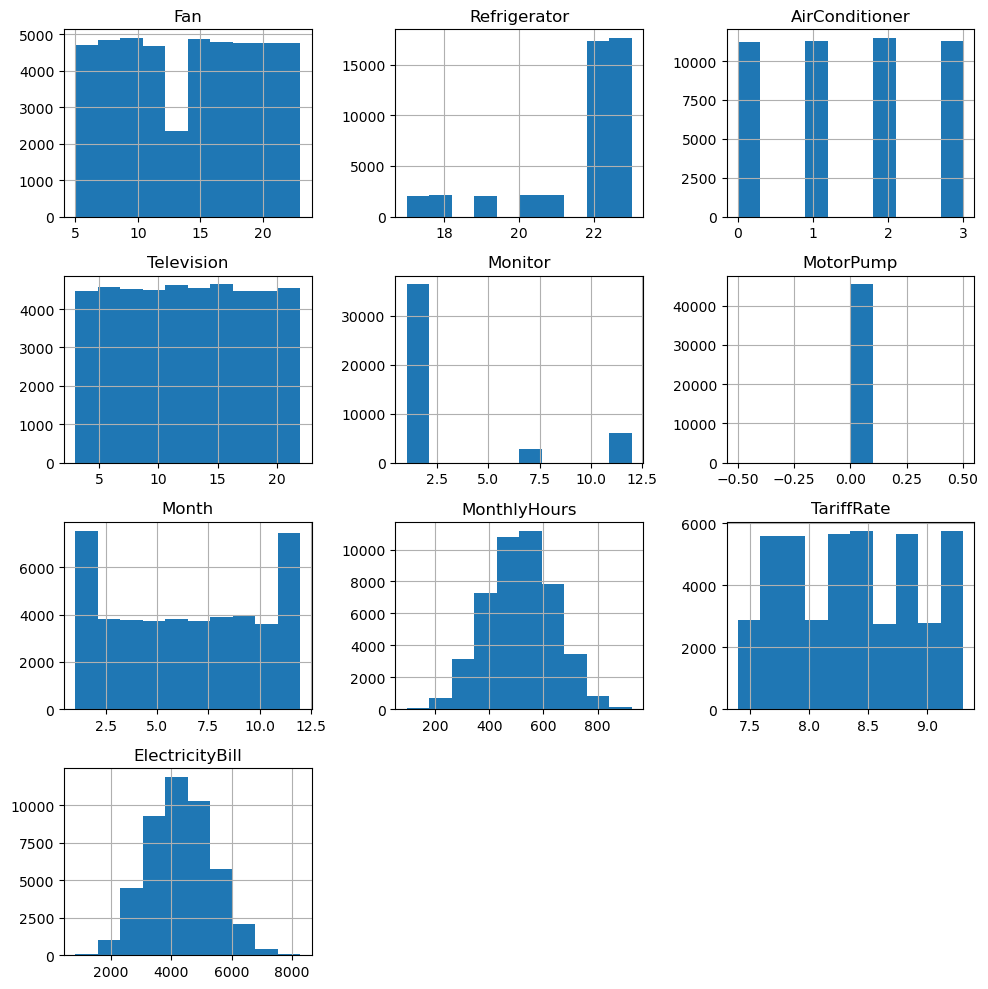

In [12]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_7708\167566597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


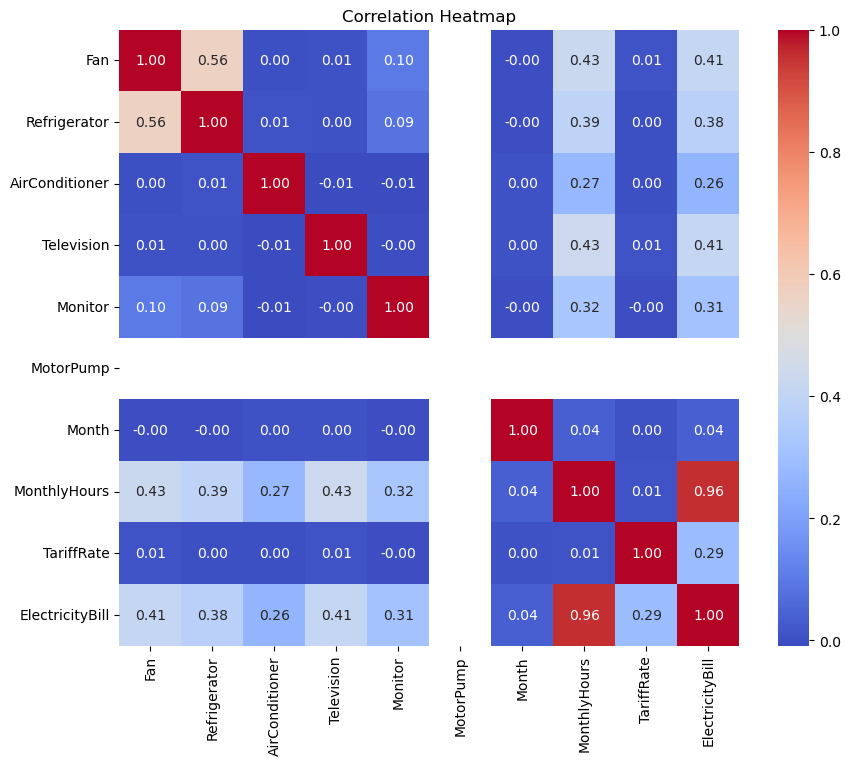

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [14]:
city_usage = df.groupby('City').sum()['ElectricityBill'].sort_values(ascending=False)
print(city_usage)

City
Navi Mumbai    13937138.1
Mumbai         13576872.4
Pune           13075180.3
Nagpur         12991516.9
Chennai        12882751.2
Hyderabad      12544039.2
New Delhi      12481434.0
Gurgaon        12376063.6
Kolkata        12344873.7
Faridabad      12044351.7
Noida          11734232.8
Ahmedabad      11602540.4
Shimla         11020132.2
Ratnagiri      11010992.8
Vadodara       10948977.0
Dahej          10946173.6
Name: ElectricityBill, dtype: float64


C:\Users\pavan\AppData\Local\Temp\ipykernel_7708\4034381947.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_usage = df.groupby('City').sum()['ElectricityBill'].sort_values(ascending=False)


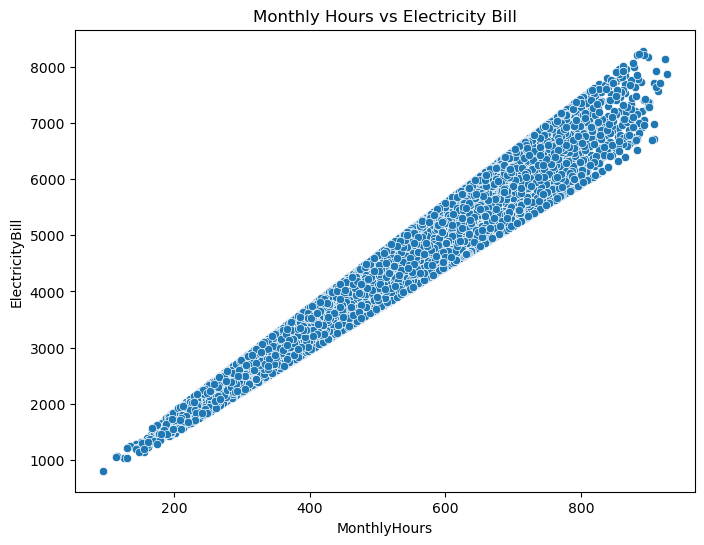

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MonthlyHours', y='ElectricityBill', data=df)
plt.title('Monthly Hours vs Electricity Bill')
plt.show()

# Appliance Usage Distribution by City:

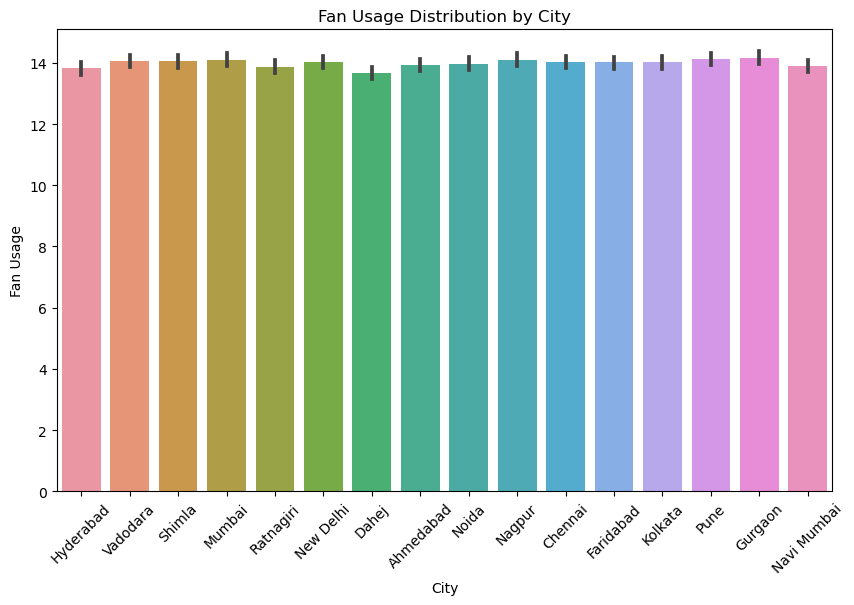

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Fan', data=df)
plt.title('Fan Usage Distribution by City')
plt.xlabel('City')
plt.ylabel('Fan Usage')
plt.xticks(rotation=45)
plt.show()

# Monthly Electricity Consumption Trends:

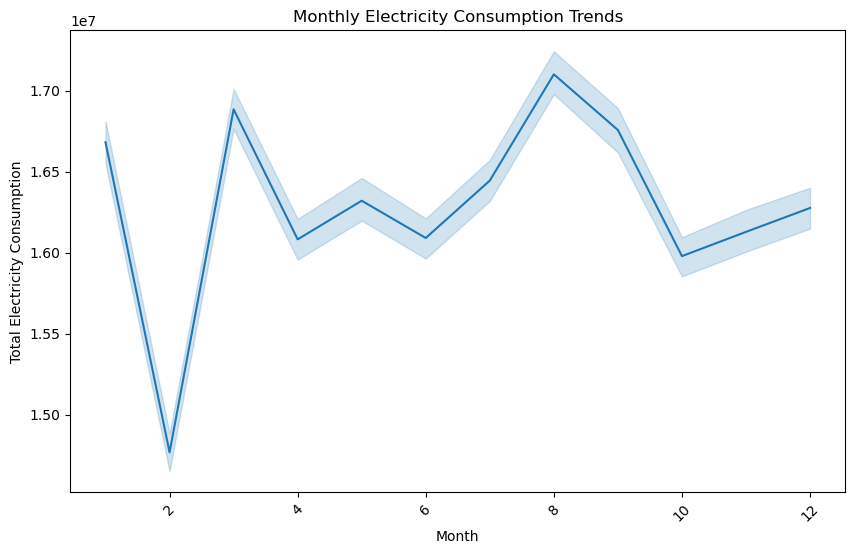

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='ElectricityBill', data=df, estimator=sum)
plt.title('Monthly Electricity Consumption Trends')
plt.xlabel('Month')
plt.ylabel('Total Electricity Consumption')
plt.xticks(rotation=45)
plt.show()

# Company Market Share Analysis:

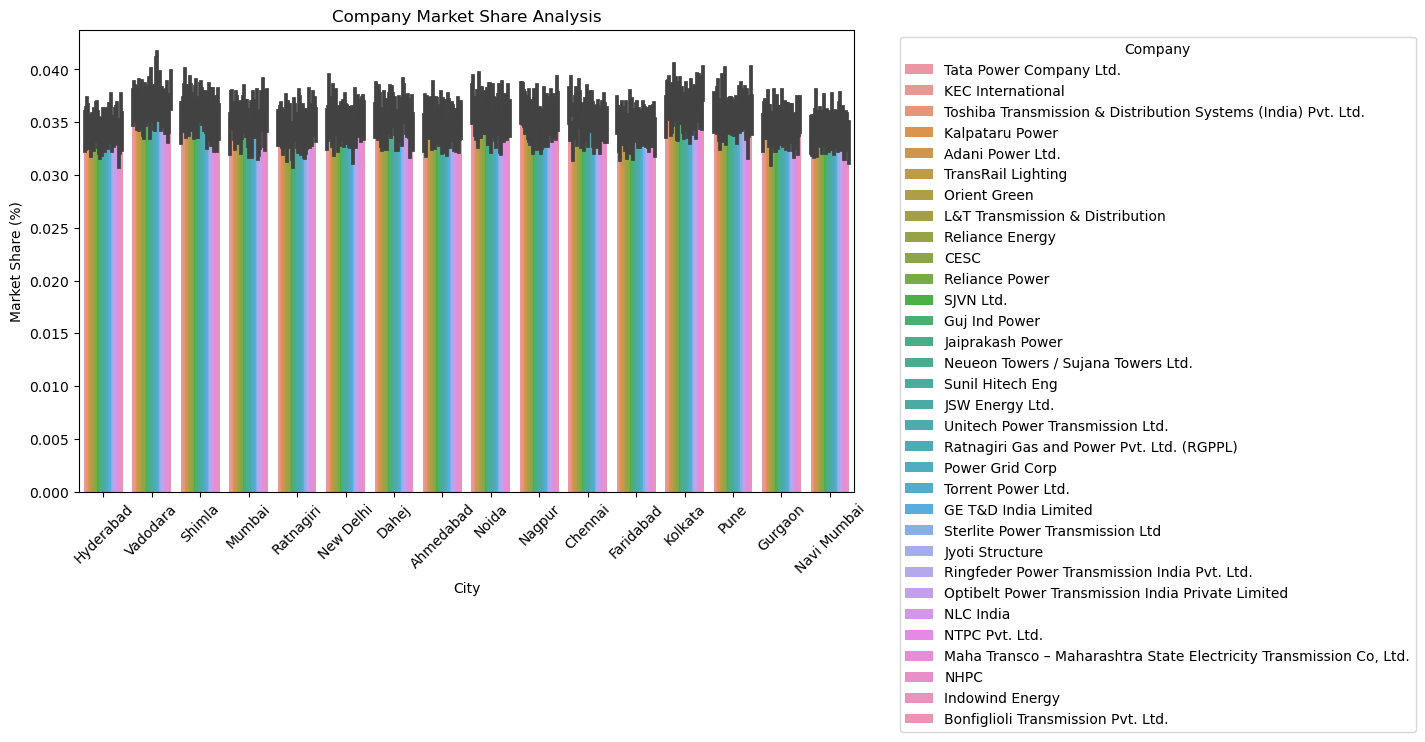

In [18]:
df_reset = df.reset_index(drop=True)
# Calculate total electricity bill per city
city_total_bill = df_reset.groupby('City')['ElectricityBill'].sum().reset_index()

# Merge total bill back into the original DataFrame
df_reset = pd.merge(df_reset, city_total_bill, on='City', suffixes=('', '_total'))

# Calculate market share
df_reset['MarketShare'] = (df_reset['ElectricityBill'] / df_reset['ElectricityBill_total']) * 100

# Plot the market share analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='MarketShare', hue='Company', data=df_reset)
plt.title('Company Market Share Analysis')
plt.xlabel('City')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Tariff Rate Comparison:

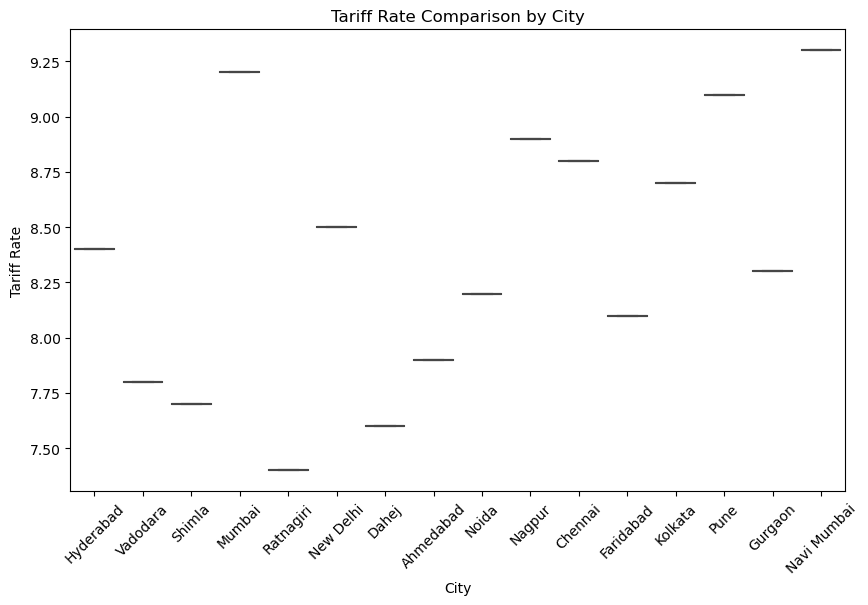

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='TariffRate', data=df)
plt.title('Tariff Rate Comparison by City')
plt.xlabel('City')
plt.ylabel('Tariff Rate')
plt.xticks(rotation=45)
plt.show()


# Customer Segmentation Based on Usage Patterns:

C:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


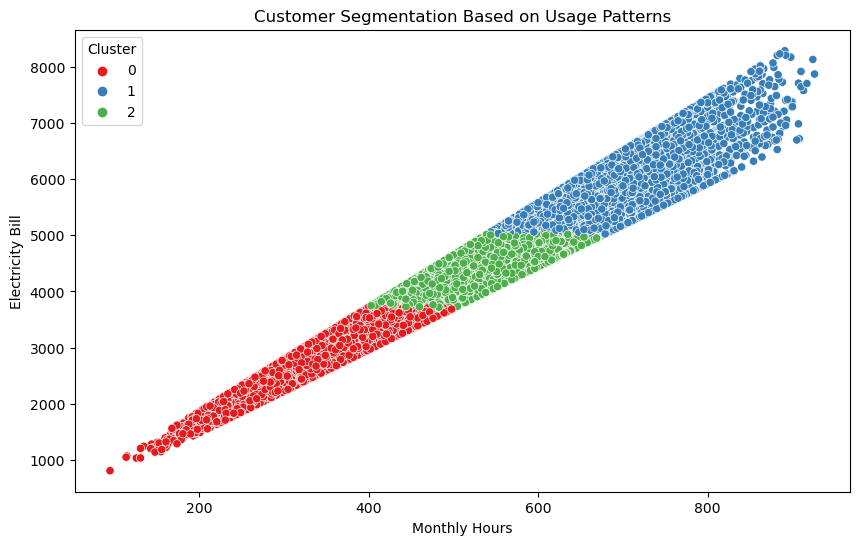

In [20]:
from sklearn.cluster import KMeans
# MonthlyHours and ElectricityBill are the relevant features
X = df[['MonthlyHours', 'ElectricityBill']]
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyHours', y='ElectricityBill', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segmentation Based on Usage Patterns')
plt.xlabel('Monthly Hours')
plt.ylabel('Electricity Bill')
plt.show()

# Impact of Appliances on Electricity Bill:

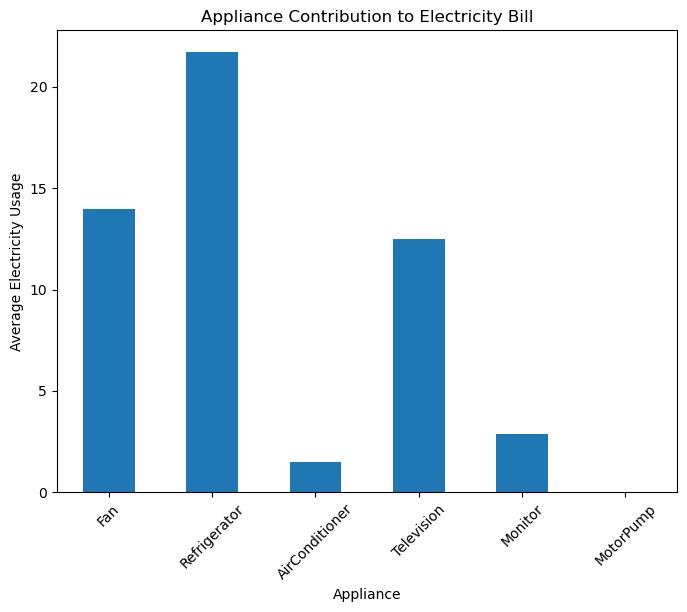

In [21]:
appliances = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']]
appliances_mean = appliances.mean()
plt.figure(figsize=(8, 6))
appliances_mean.plot(kind='bar')
plt.title('Appliance Contribution to Electricity Bill')
plt.xlabel('Appliance')
plt.ylabel('Average Electricity Usage')
plt.xticks(rotation=45)
plt.show()

# Seasonal Electricity Consumption:

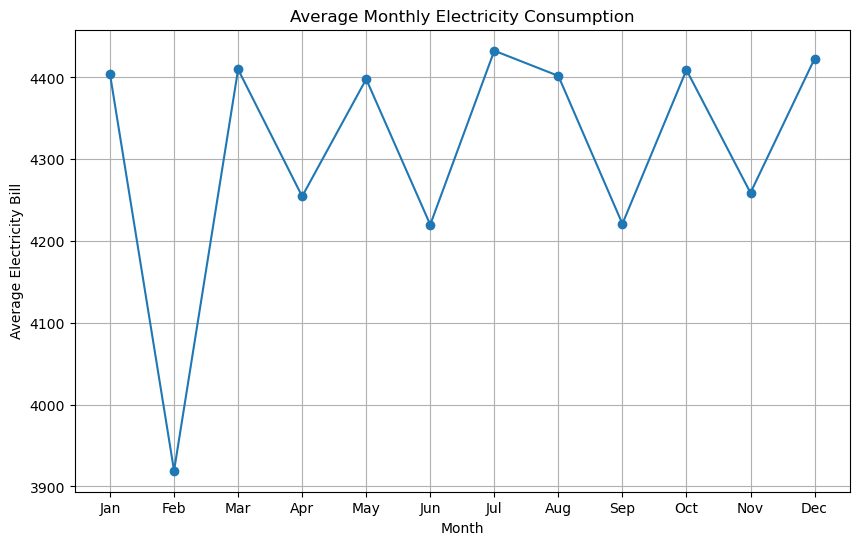

In [22]:
plt.figure(figsize=(10, 6))
df.groupby('Month')['ElectricityBill'].mean().plot(kind='line', marker='o')
plt.title('Average Monthly Electricity Consumption')
plt.xlabel('Month')
plt.ylabel('Average Electricity Bill')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


# Brand Loyalty or Preference:

<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

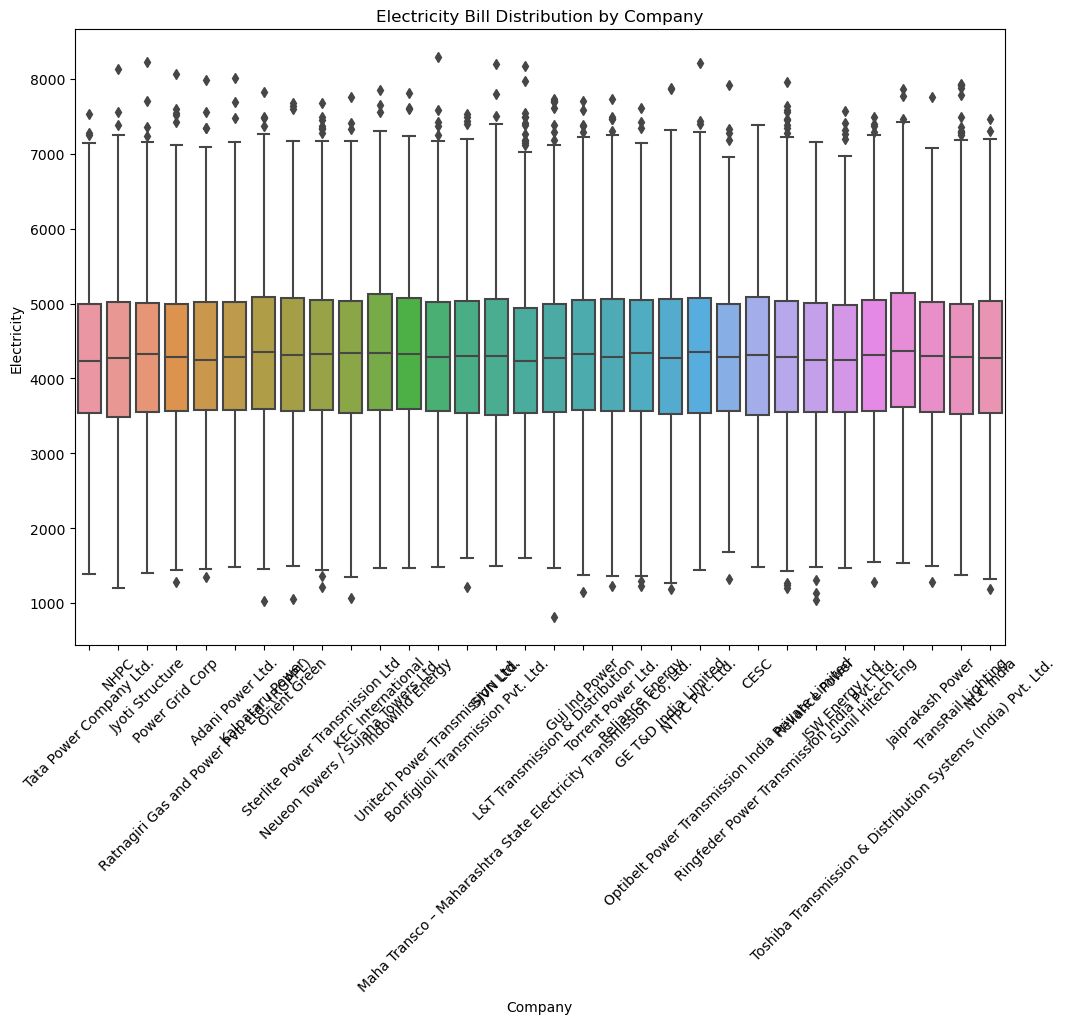

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Company', y='ElectricityBill', data=df)
plt.title('Electricity Bill Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Electricity')
plt.xticks(rotation=45)
plt.xticks

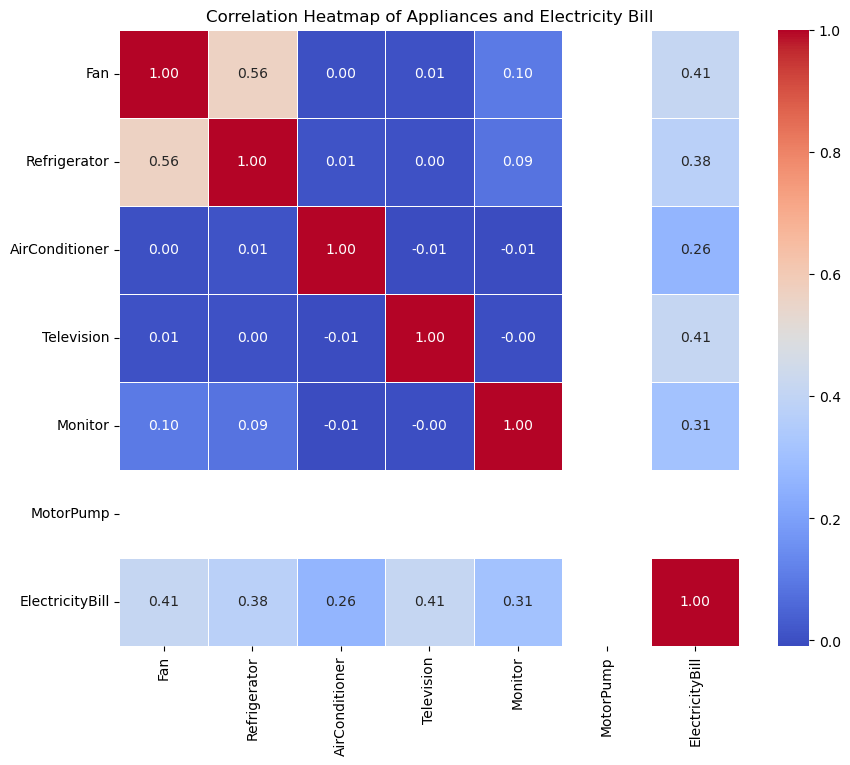

In [24]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 'ElectricityBill']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Appliances and Electricity Bill')
plt.show()


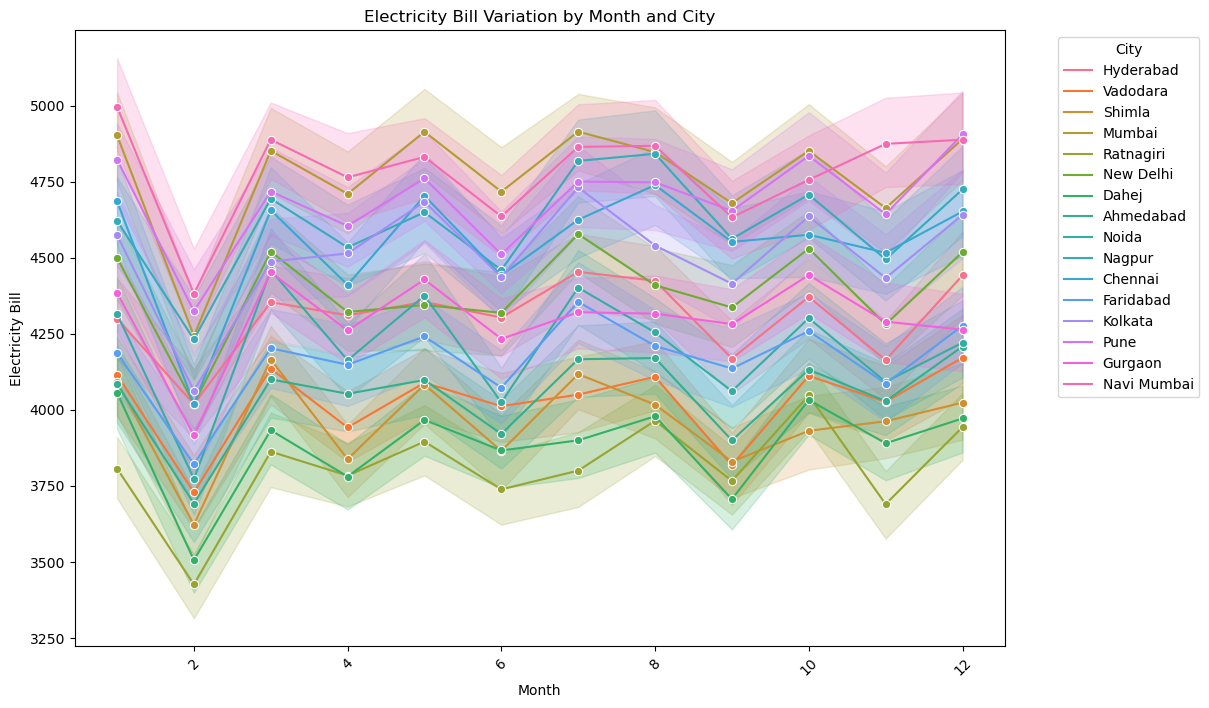

In [25]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='ElectricityBill', hue='City', data=df, marker='o')
plt.title('Electricity Bill Variation by Month and City')
plt.xlabel('Month')
plt.ylabel('Electricity Bill')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [26]:
highest_usage_row = df.loc[df['ElectricityBill'].idxmax()]

highest_usage_month = highest_usage_row['Month']
highest_usage_company = highest_usage_row['Company']
highest_usage_city = highest_usage_row['City']
appliances = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']
highest_usage_appliance = max(appliances, key=lambda app: highest_usage_row[app])


print("Highest electricity usage:")
print(f"Month: {highest_usage_month}")
print(f"Company: {highest_usage_company}")
print(f"City: {highest_usage_city}")
print(f"Most used appliance: {highest_usage_appliance}")


Highest electricity usage:
Month: 11
Company: Unitech Power Transmission Ltd.
City: Navi Mumbai
Most used appliance: Refrigerator


In [27]:
N = 5  # You can change this value to get the top N cities
top_cities = df.groupby('City')['ElectricityBill'].sum().nlargest(N).index.tolist()

# Filter the dataframe to include only data from the top cities
df_top_cities = df[df['City'].isin(top_cities)]

# Calculate the average electricity usage per appliance for each of the top cities
avg_usage_per_appliance = df_top_cities.groupby('City')[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump']].mean()

print("Average Electricity Usage per Appliance for Top Cities:")
print(avg_usage_per_appliance)


Average Electricity Usage per Appliance for Top Cities:
                   Fan  Refrigerator  AirConditioner  Television   Monitor  \
City                                                                         
Chennai      14.029993     21.723006        1.497883   12.454834  2.971771   
Mumbai       14.108573     21.712579        1.504919   12.680604  2.909698   
Nagpur       14.104048     21.746804        1.536222   12.497159  2.916548   
Navi Mumbai  13.901510     21.673644        1.490391   12.564173  2.868566   
Pune         14.134864     21.681492        1.493902   12.483142  2.794476   

             MotorPump  
City                    
Chennai            0.0  
Mumbai             0.0  
Nagpur             0.0  
Navi Mumbai        0.0  
Pune               0.0  


# Temporal Analysis of Tariff Rates:

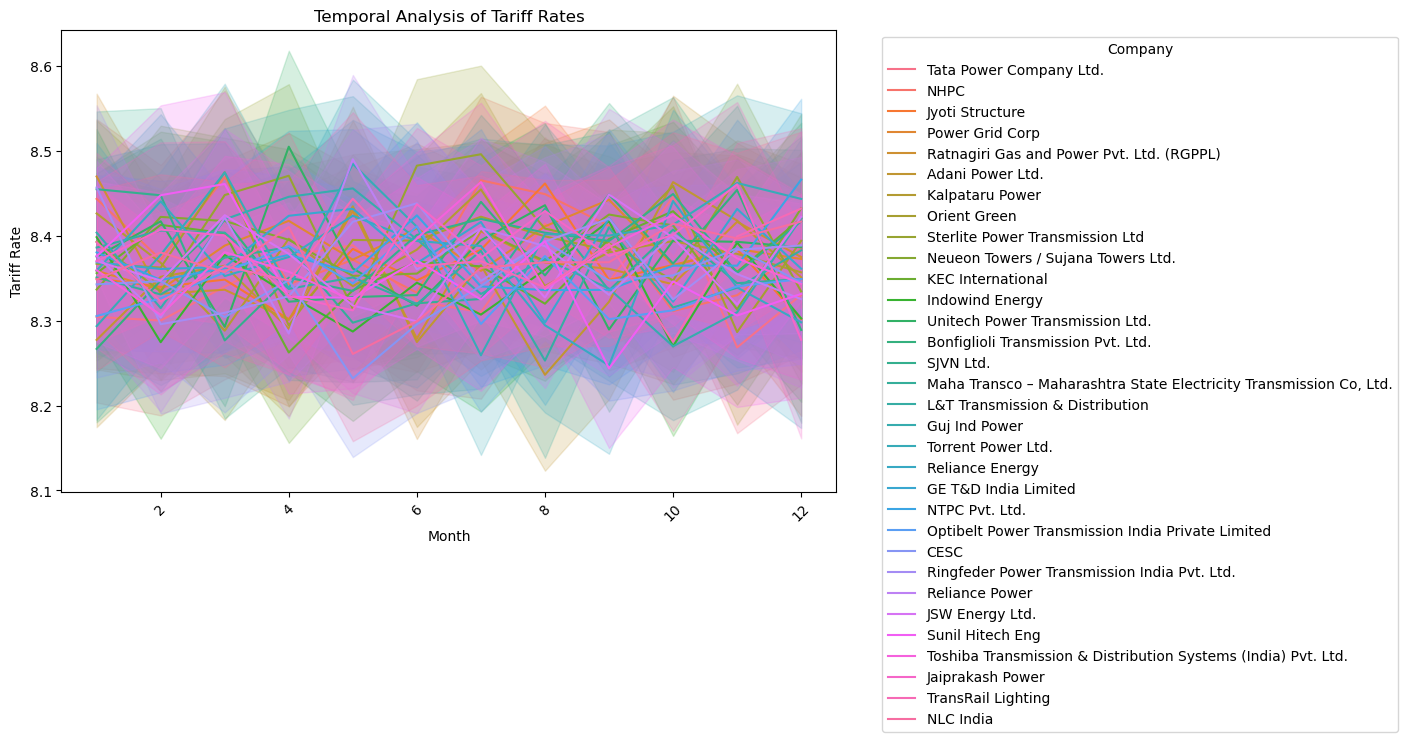

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='TariffRate', hue='Company', data=df)
plt.title('Temporal Analysis of Tariff Rates')
plt.xlabel('Month')
plt.ylabel('Tariff Rate')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Outlier detection

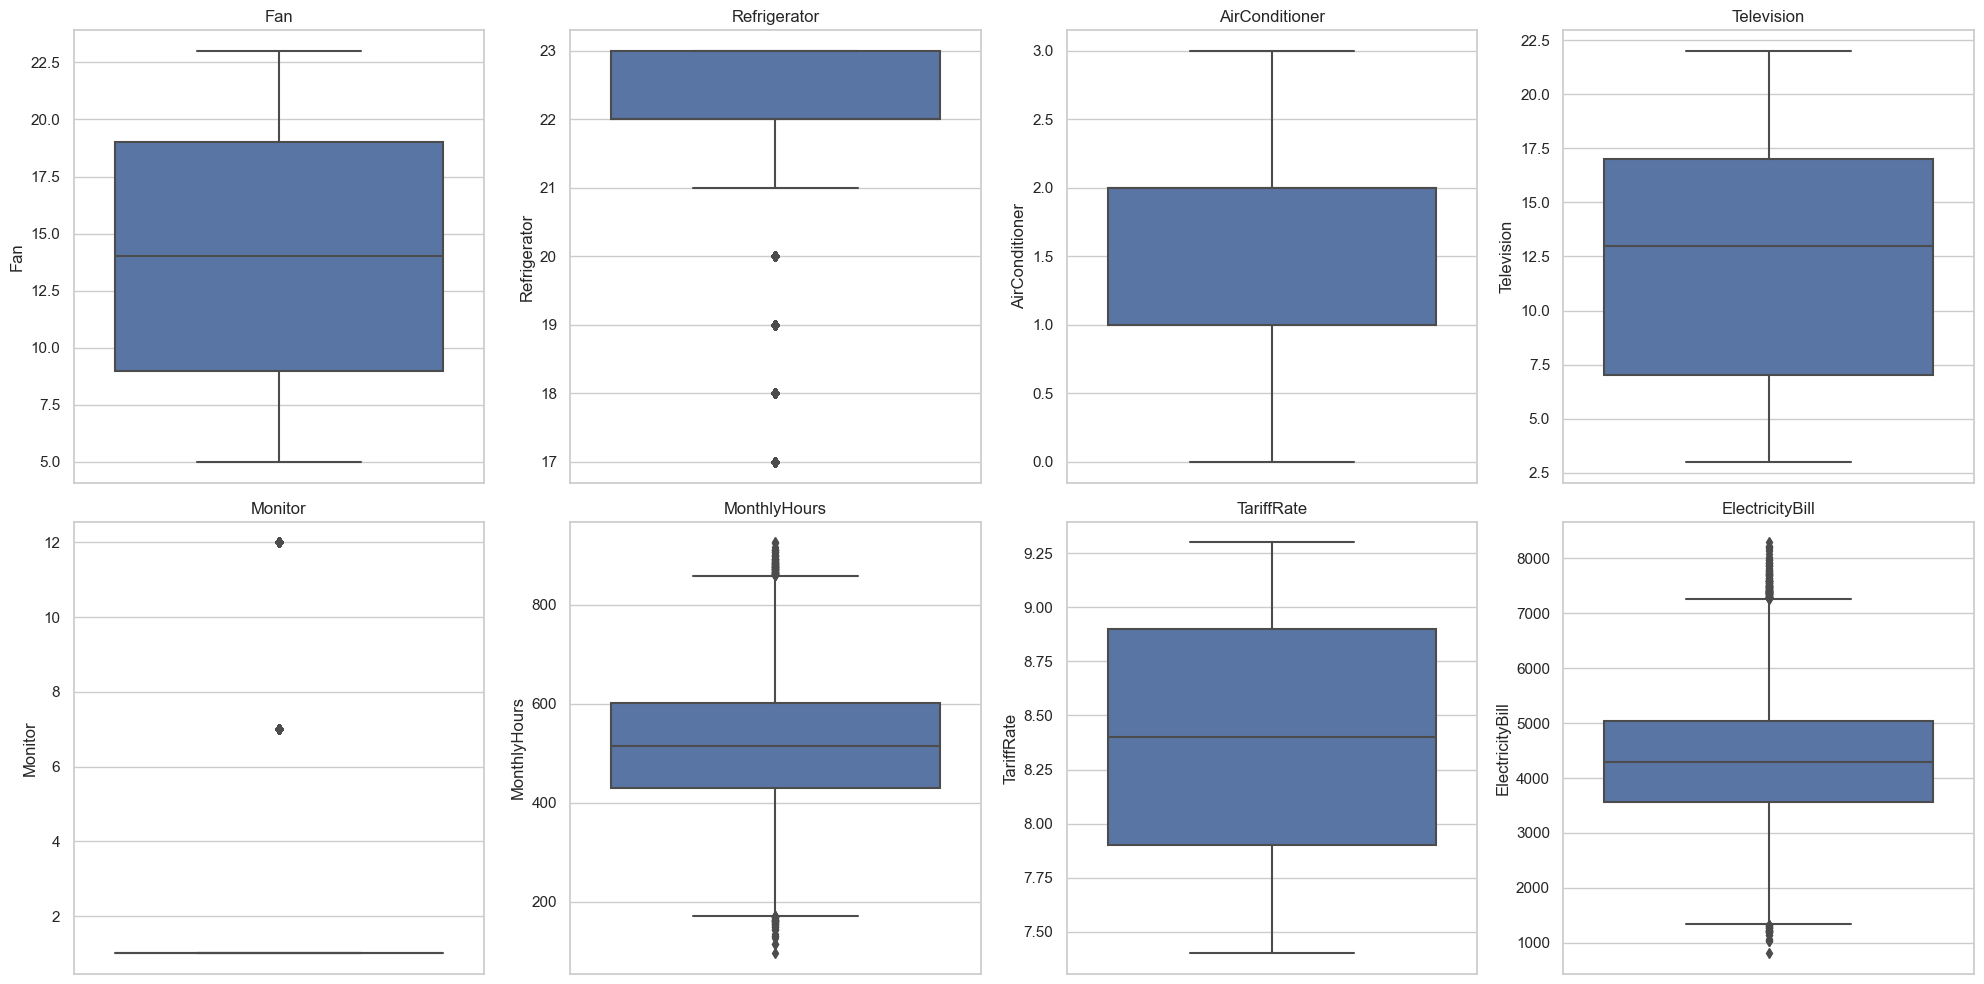

In [29]:
# Visualization with box plots
sns.set(style="whitegrid")
columns_to_plot = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MonthlyHours', 'TariffRate', 'ElectricityBill']
plt.figure(figsize=(20, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [35]:
# Function to identify outliers using the IQR method
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

In [36]:
# Detecting outliers in specific columns
columns_check = ['Monitor', 'MonthlyHours', 'ElectricityBill']
outliers_dict = {column: detect_outliers_iqr(df, column) for column in columns_check}

In [37]:
# Display the number of outliers detected in each column
outliers_count = {column: len(outliers) for column, outliers in outliers_dict.items()}
print(outliers_count)

{'Monitor': 8971, 'MonthlyHours': 115, 'ElectricityBill': 161}


Monitor: 8,971 Outliers
The large number of outliers suggests that the usage of monitors varies widely among the records. This could be due to different numbers of monitors used, variations in usage patterns (e.g., for work, gaming, or other activities), or a mix of residential and commercial properties in the dataset.

MonthlyHours: 115 Outliers
These outliers could indicate months with unusually high electricity usage. This might be due to extreme weather conditions requiring more heating or cooling, errors in data recording, or instances where a property was used more intensively (e.g., a home office setup leading to increased consumption).

ElectricityBill: 161 Outliers
These could result from the excessive usage captured by the MonthlyHours outliers, higher tariff rates, or a combination of high usage across multiple appliances. They might also reflect billing errors or special circumstances (e.g., back-billing for previous undercharges).

In [39]:
# Extracting outliers for the 'MonthlyHours' column
monthly_hours_outliers = detect_outliers_iqr(df, 'MonthlyHours')

# Display the outliers for 'MonthlyHours'
print(monthly_hours_outliers)

       Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  \
314     17            22               3          21       12          0   
669     20            23               2          20       12          0   
1659    23            22               2          22       12          0   
2063     6            20               0           3        1          0   
2566     7            18               0           3        1          0   
...    ...           ...             ...         ...      ...        ...   
43620   18            23               2          20       12          0   
43832   20            22               2          19       12          0   
44084   17            23               3          22       12          0   
44620    9            17               0           5        1          0   
45305   11            23               3          20       12          0   

       Month         City                          Company  MonthlyHours  \
314        

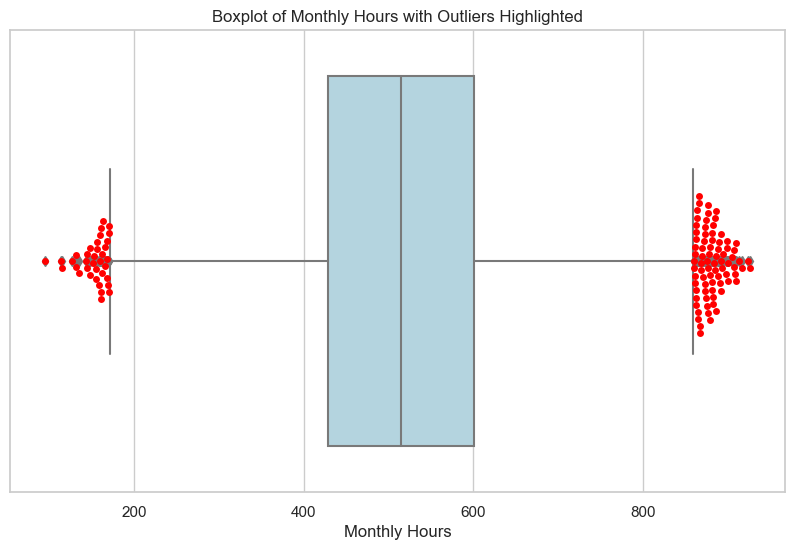

In [41]:
# Plotting the original 'MonthlyHours' data
plt.figure(figsize=(10, 6))  
sns.boxplot(x=df['MonthlyHours'], color='lightblue')
sns.swarmplot(x=monthly_hours_outliers['MonthlyHours'], color='red')
plt.title('Boxplot of Monthly Hours with Outliers Highlighted')
plt.xlabel('Monthly Hours')
plt.show()

### Anamolies

In [42]:
# Selecting relevant numerical features for anomaly detection
features = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 'MonthlyHours', 'TariffRate', 'ElectricityBill']

In [43]:
# Preparing the data
X = df[features]

In [44]:
# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Applying Isolation Forest
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X_scaled)

IsolationForest(random_state=42)

In [49]:
# Predicting anomalies (-1 for outliers, 1 for inliers)
df['Anomaly'] = model.predict(X_scaled)

In [51]:
# Display the first few rows with the anomaly column
print(df.head(10))

   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16            23               2           6        1          0     10   
1   19            22               2           3        1          0      5   
2    7            20               2           6        7          0      7   
3    7            22               3          21        1          0      6   
4   11            23               2          11        1          0      2   
5   13            22               0          18        1          0      6   
6   23            22               3          20       12          0      5   
7   22            23               0          21        1          0     12   
8    8            20               2           8        1          0      8   
9   10            23               0          18        7          0      1   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.  

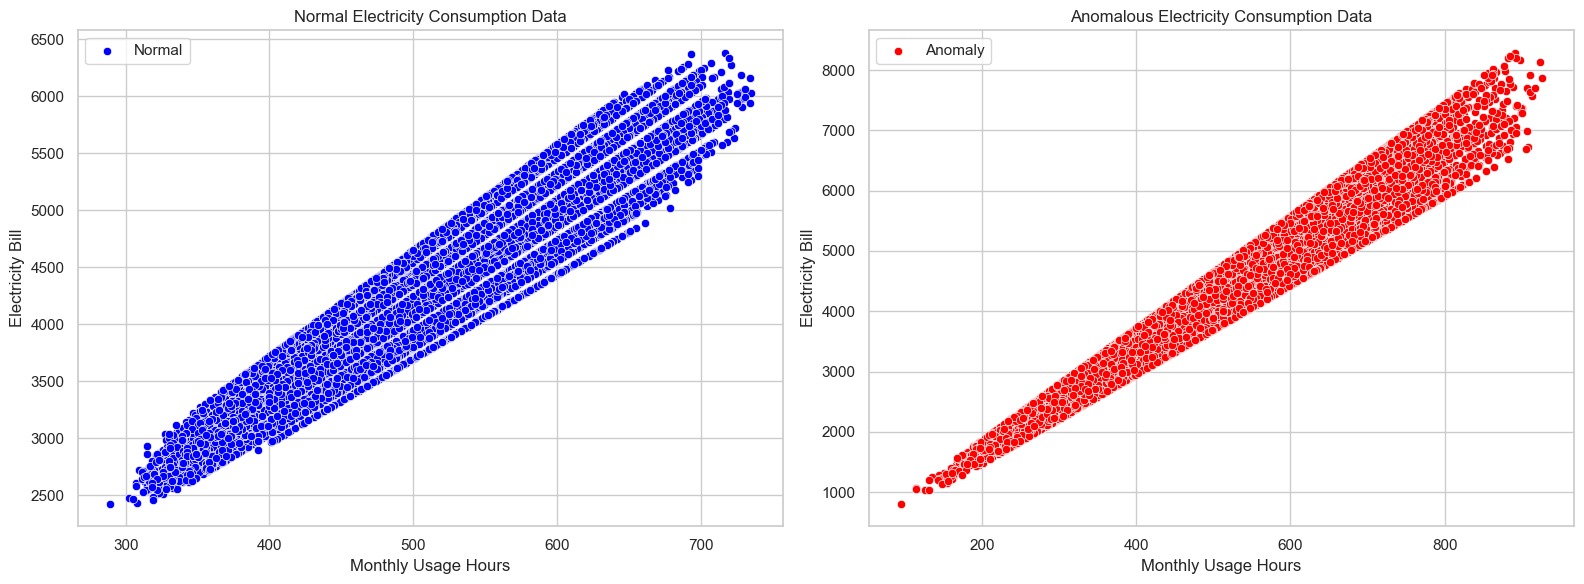

In [56]:
#plotting anomaly and normal point

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for Normal data points
sns.scatterplot(ax=axes[0], data=df[df['Anomaly'] == 1], x='MonthlyHours', y='ElectricityBill', color='blue', label='Normal')
axes[0].set_title('Normal Electricity Consumption Data')
axes[0].set_xlabel('Monthly Usage Hours')
axes[0].set_ylabel('Electricity Bill')

# Plot for Anomalies
sns.scatterplot(ax=axes[1], data=df[df['Anomaly'] == -1], x='MonthlyHours', y='ElectricityBill', color='red', label='Anomaly')
axes[1].set_title('Anomalous Electricity Consumption Data')
axes[1].set_xlabel('Monthly Usage Hours')
axes[1].set_ylabel('Electricity Bill')

plt.tight_layout()
plt.show()

# Predictive Modeling

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 'MonthlyHours', 'TariffRate']]
y = df['ElectricityBill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


Mean Squared Error: 4969.580919656898
Mean Absolute Error: 49.1957647061684
R-squared Score: 0.9956384956127871


C:\Users\Sowmya\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Sowmya\AppData\Local\Temp\ipykernel_18856\2525700513.py:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap


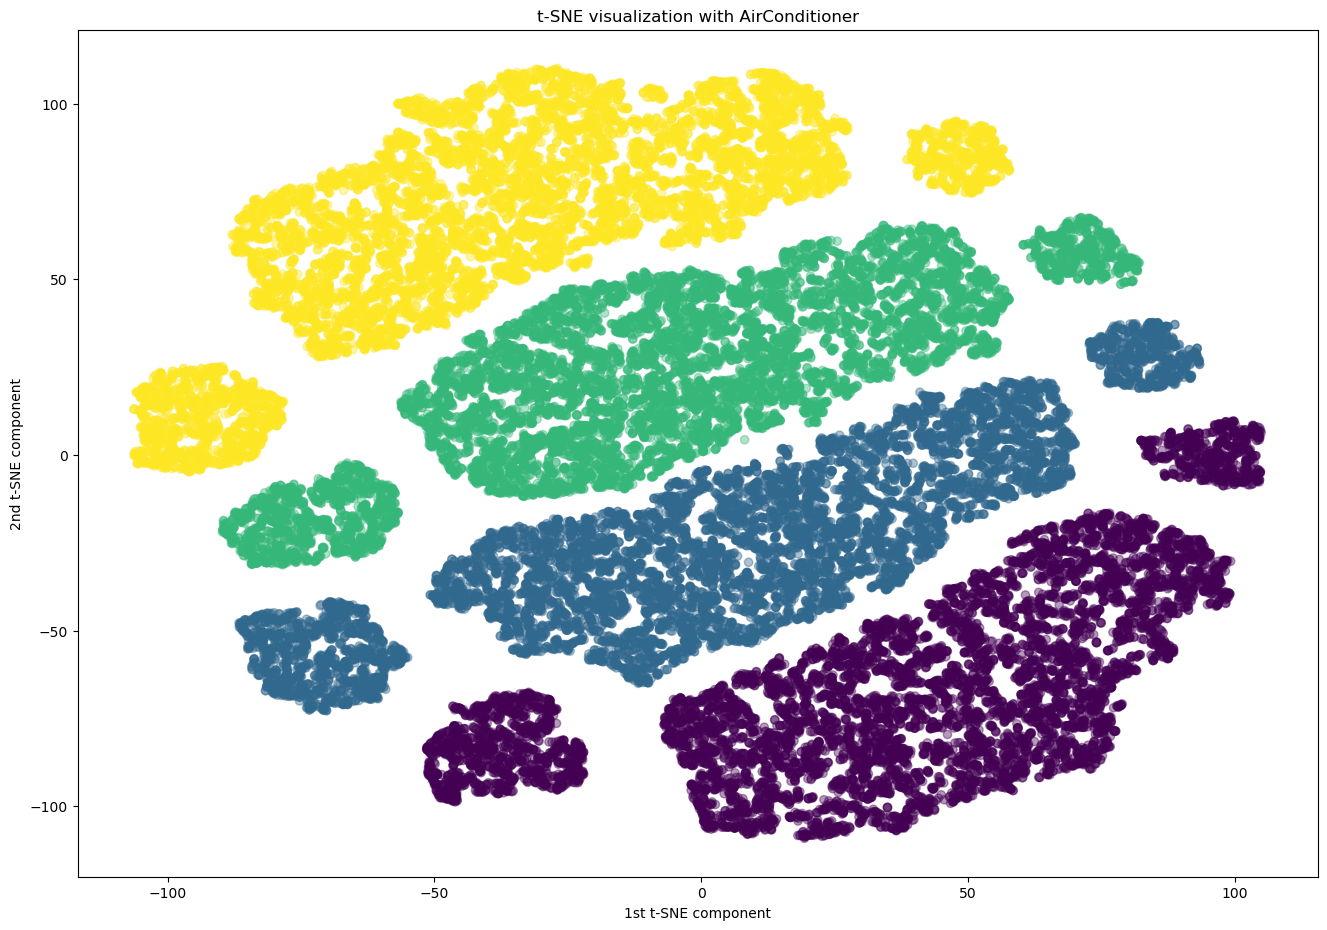

In [1]:
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/Sowmya/OneDrive/Documents/electricity_bill_dataset1.csv")

# Drop non-numeric columns and unnecessary columns
df_numeric = df.drop(['City', 'Company'], axis=1)

# Separate categorical and numerical columns
categorical_cols = ['AirConditioner', 'Fan']  # Replace 'City' and 'Company' with other variables
numeric_cols = df_numeric.columns

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse=False), categorical_cols)  # Set sparse=False here
    ]
)

# Create the pipeline
tsne_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dim_reduction', PCA(n_components=10)),  # Use a value less than or equal to the number of features
    ('2d_reduction', TSNE(n_components=2, init='pca', random_state=42))
])

# Apply the pipeline
tsne_results = tsne_pipeline.fit_transform(df)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 11))
scatter = ax.scatter(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    c=df['AirConditioner'],  # Use 'AirConditioner' for coloring
    cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap
    alpha=0.4
)

# Produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="AirConditioner", bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("t-SNE visualization with AirConditioner")
plt.xlabel("1st t-SNE component")
plt.ylabel("2nd t-SNE component")
plt.show()


C:\Users\Sowmya\AppData\Local\Temp\ipykernel_18856\1185209378.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap


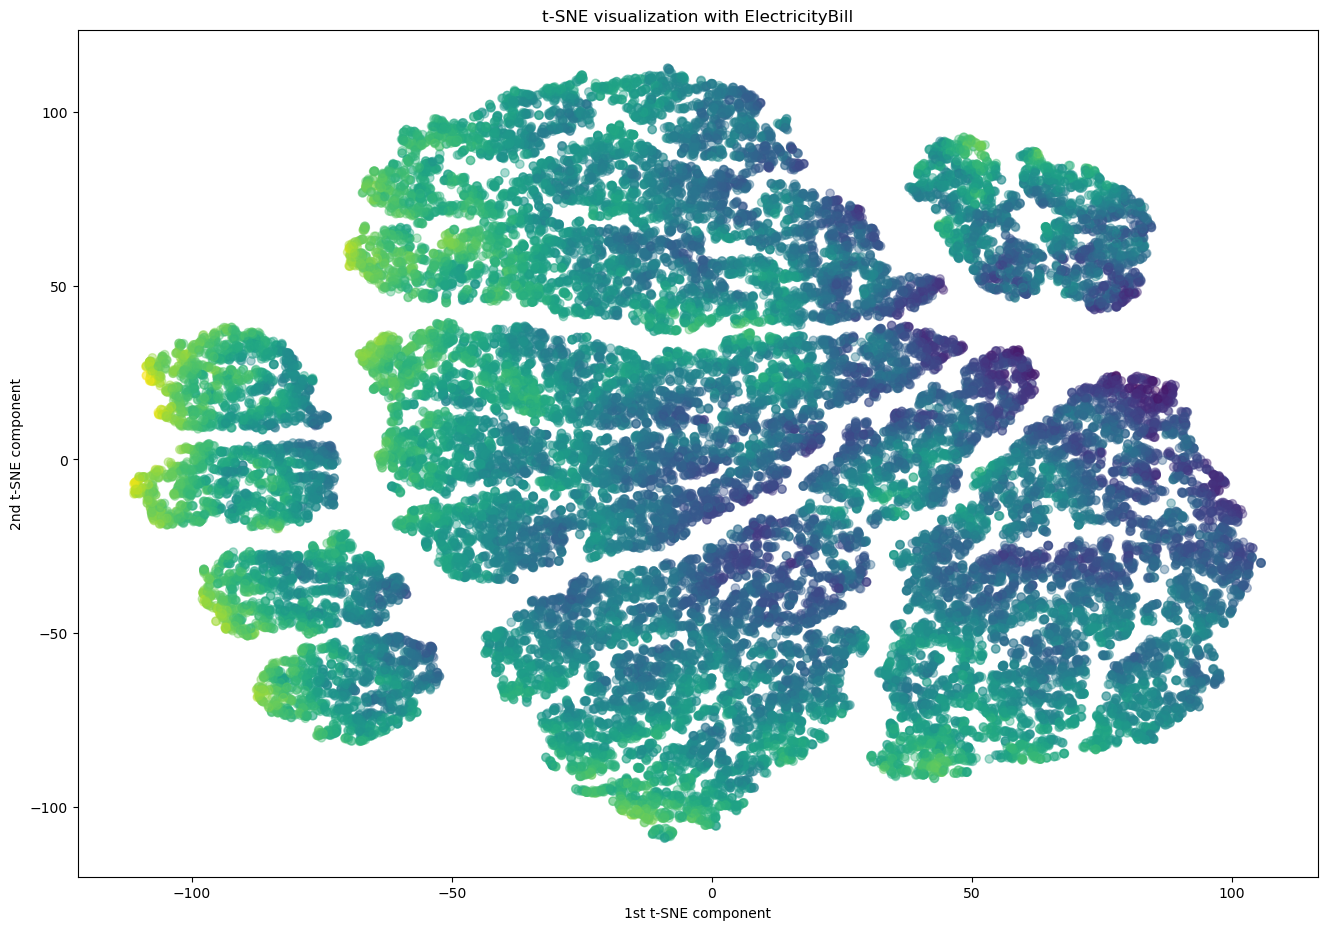

In [2]:
from sklearn.manifold import TSNE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/Sowmya/OneDrive/Documents/electricity_bill_dataset1.csv")

# Drop non-numeric columns and unnecessary columns
df_numeric = df.drop(['City', 'Company'], axis=1)

# Separate categorical and numerical columns
categorical_cols = ['Month', 'City', 'Company']  # Add or remove categorical columns as needed
numeric_cols = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 'MonthlyHours', 'TariffRate', 'ElectricityBill']

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Create the pipeline
tsne_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dim_reduction', TruncatedSVD(n_components=10)),  # Use TruncatedSVD instead of PCA
    ('2d_reduction', TSNE(n_components=2, init='pca', random_state=42))
])

# Apply the pipeline
tsne_results = tsne_pipeline.fit_transform(df)

# Normalize 'ElectricityBill' for better visualization
normalized_electricity_bill = (df['ElectricityBill'] - df['ElectricityBill'].min()) / (df['ElectricityBill'].max() - df['ElectricityBill'].min())

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 11))
scatter = ax.scatter(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    c=normalized_electricity_bill,  # Use normalized 'ElectricityBill' for coloring
    cmap=plt.cm.get_cmap('viridis'),  # You can choose a different colormap
    alpha=0.4
)

# Produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="ElectricityBill", bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("t-SNE visualization with ElectricityBill")
plt.xlabel("1st t-SNE component")
plt.ylabel("2nd t-SNE component")
plt.show()


C:\Users\Sowmya\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Sowmya\AppData\Local\Temp\ipykernel_18856\2289540935.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral'),


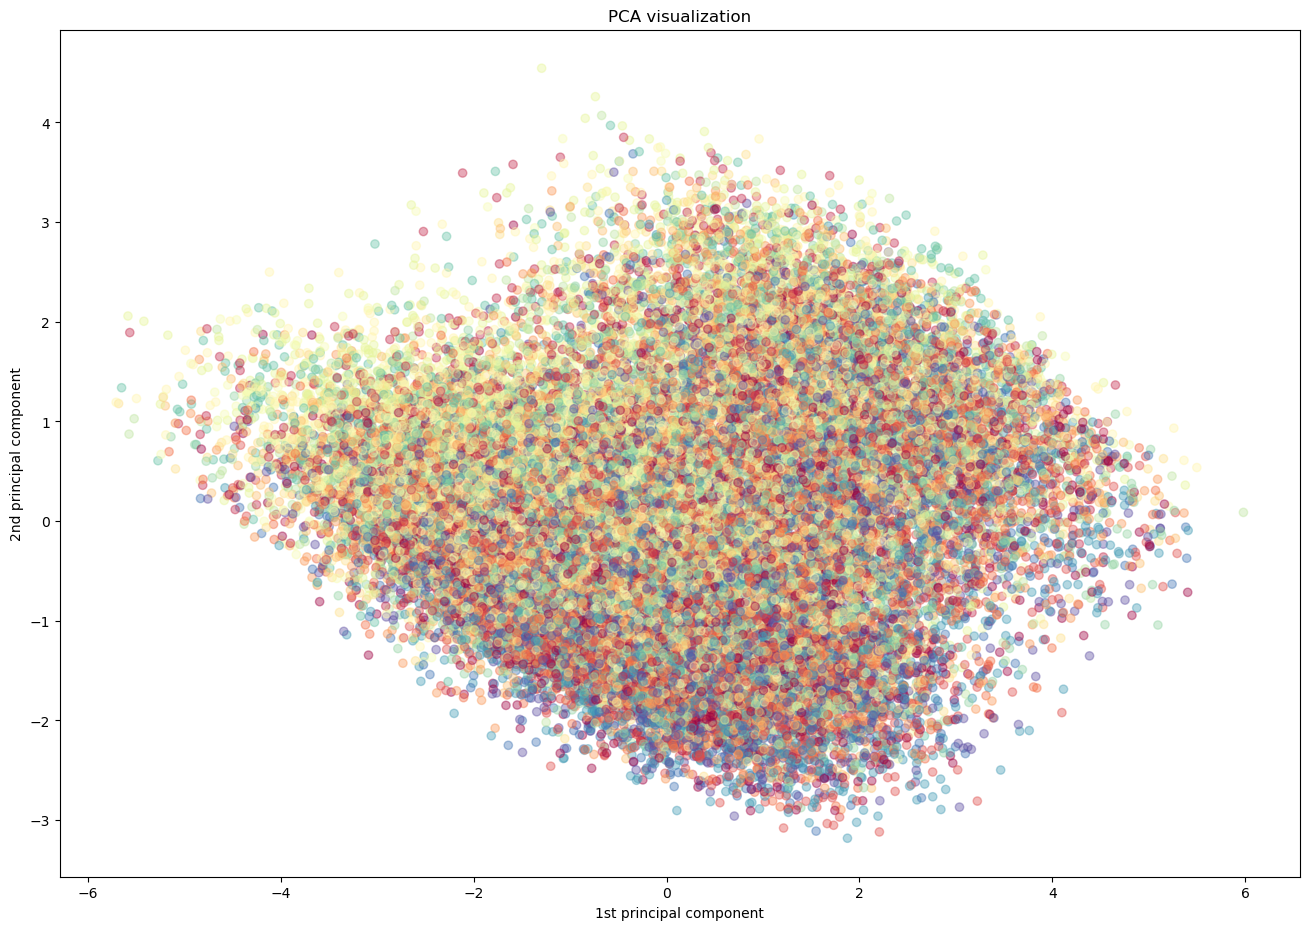

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("C:/Users/Sowmya/OneDrive/Documents/electricity_bill_dataset1.csv")

# Drop non-numeric columns and unnecessary columns
df_numeric = df.drop(['City', 'Company'], axis=1)

# Separate categorical and numerical columns
categorical_cols = ['City', 'Company']
numeric_cols = df_numeric.columns

# Create transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse=False), categorical_cols)  # Set sparse=False here
    ]
)

# Create the pipeline
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dim_reduction', PCA(n_components=2))
])

# Apply the pipeline
pca_results = pca_pipeline.fit_transform(df)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 11))
scatter = ax.scatter(
    x=pca_results[:, 0],
    y=pca_results[:, 1],
    c=df['City'].astype('category').cat.codes,  # Assuming 'City' is the class column
    cmap=plt.cm.get_cmap('Spectral'),
    alpha=0.4
)

# Produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()
